In [5]:
# ETL LECTURA Y TRANSFORMACION DE LOS DATOS PARA SU PORSTERIOR USO
# Este notebook contiene los procedimeintos realizados para la lectura y tratameinto de datos con nulos, repetidos etc
import gzip
import json
import pandas as pd
import ast
import seaborn as sns


In [6]:

def A_txt(nombre_archivo_gz,nombre_archivo_descomprimido):
    # Nombre del archivo comprimido .gz


    # Nombre del archivo descomprimido lo paso a txt, para luego hacer una lectura linea por linea
    #nombre_archivo_descomprimido = 'users_items.txt'  # lo grabare como txt

    with gzip.open(nombre_archivo_gz, 'rb') as archivo_comprimido, open(nombre_archivo_descomprimido, 'wb') as archivo_descomprimido:
        contenido_comprimido = archivo_comprimido.read()
        archivo_descomprimido.write(contenido_comprimido)

# Ahora, el contenido del archivo comprimido se ha descomprimido y se ha guardado en el archivo descomprimido.


In [2]:
def leo_lineaxlinea(arch_txt):
    # Listas para almacenar los diccionarios y los números de línea con errores
    data_list = []
    lineas_con_errores = []

    # Contadores para el total de líneas y registros leídos correctamente
    total_lineas = 0
    registros_correctos = 0

    # Abrir el archivo y leerlo línea por línea
    with open(arch_txt, 'r', encoding='utf-8') as archivo:
        for num_linea, linea in enumerate(archivo, start=1):
            total_lineas += 1
            try:
            # Intentar cargar la línea como JSON
                data = json.loads(linea)
                data_list.append(data)
                registros_correctos += 1
            except json.JSONDecodeError:
                try:
                    # Si falla como JSON, intentar cargarlo como diccionario
                    data = eval(linea)  # Usa eval para interpretar la línea como un diccionario
                    if isinstance(data, dict):
                        data_list.append(data)
                        registros_correctos += 1
                    else:
                         lineas_con_errores.append(num_linea)
                except Exception as e:
                    lineas_con_errores.append(num_linea)
    # Imprimir los resultados
    print(f'Total de líneas o registros: {total_lineas}')
    print(f'Registros leídos correctamente: {registros_correctos}')
    print(f'Registros mal leídos en líneas: {lineas_con_errores}')
    
    return data_list

    

In [7]:
# Crear un DataFrame a partir de games, es mi forma mas eficiente para leer el gz
A_txt("steam_games.json.gz","steam_games.txt")
lista=leo_lineaxlinea("steam_games.txt")
df_games = pd.DataFrame(lista)


Total de líneas o registros: 120445
Registros leídos correctamente: 120445
Registros mal leídos en líneas: []


In [ ]:
#borro los que sean todos nulos xq habian muchos
df_games.dropna(how="all",inplace=True)

<Axes: >

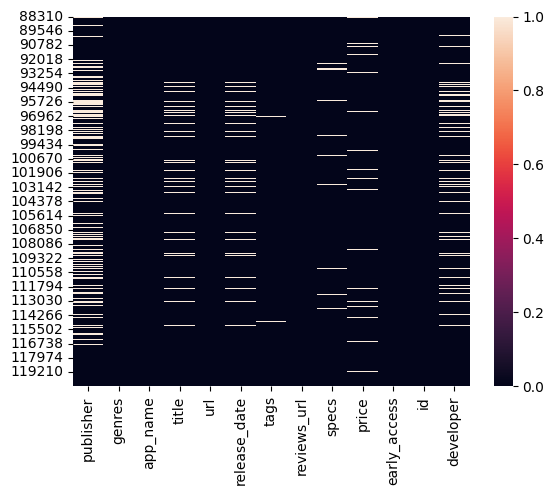

In [20]:
# mapa de calor de valores nulos, luego de borrar los nulos, de genres y en how=all
# lo hice mas abajo, pero volvi a hacer el grafico
sns.heatmap(df_games.isnull())


In [34]:
#borro url por consideralo irrelevante para el analisis de la informacion
df_games=df_games.drop(["url"],axis=1)

In [16]:
# evaluo si 2 columnas son iguales
son_iguales = df_games['app_name'] == df_games['title']

# Verificar si todas las filas son iguales
if son_iguales.all():
    print("Todas las filas en 'columna1' y 'columna2' son iguales.")
else:
    print("Las columnas 'columna1' y 'columna2' tienen diferencias en algunas filas.")


Las columnas 'columna1' y 'columna2' tienen diferencias en algunas filas.


In [17]:
diferencias = df_games['app_name'] != df_games['title']
contador_diferencias = diferencias.sum()

print("Número de filas con diferencias entre 'columna1' y 'columna2':", contador_diferencias)


Número de filas con diferencias entre 'columna1' y 'columna2': 2605


In [18]:
diferencias = df_games[df_games['app_name'] != df_games['title']]
diferencias.head(200)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88314,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN
88321,NaN,NaN,Icarus Six Sixty Six,NaN,http://store.steampowered.com/app/724910/Icaru...,NaN,[Casual],http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,False,724910,NaN
88329,NaN,NaN,After Life VR,NaN,http://store.steampowered.com/app/772590/After...,NaN,"[Early Access, Indie, VR]",http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,True,772590,NaN
88330,NaN,NaN,Kitty Hawk,NaN,http://store.steampowered.com/app/640250/Kitty...,NaN,"[Early Access, Action, Adventure, Indie, Casual]",http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,True,640250,NaN
88332,NaN,NaN,Mortars VR,NaN,http://store.steampowered.com/app/711440/Morta...,NaN,"[Early Access, Strategy, Action, Indie, Casual...",http://steamcommunity.com/app/711440/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.99,True,711440,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94042,NaN,NaN,Windlands,NaN,http://store.steampowered.com/app/428370/Windl...,NaN,"[Adventure, VR, Indie, Exploration, First-Pers...",http://steamcommunity.com/app/428370/reviews/?...,"[Single-player, Full controller support, Steam...",19.99,False,428370,NaN
94043,NaN,NaN,Marble Mountain,NaN,http://store.steampowered.com/app/409390/Marbl...,NaN,"[Action, Casual, Adventure, Indie, VR]",http://steamcommunity.com/app/409390/reviews/?...,"[Single-player, Steam Achievements, Full contr...",9.99,False,409390,NaN
94044,NaN,NaN,Skeet: VR Target Shooting,NaN,http://store.steampowered.com/app/446770/Skeet...,NaN,"[Action, Simulation, VR]",http://steamcommunity.com/app/446770/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",Free,False,446770,NaN
94045,NaN,NaN,Felt Tip Circus,NaN,http://store.steampowered.com/app/427890/Felt_...,NaN,"[Action, Indie, Casual, VR]",http://steamcommunity.com/app/427890/reviews/?...,"[Single-player, Shared/Split Screen, Steam Wor...",7.99,False,427890,NaN


In [44]:
#borro la columna title ya que es igual a app_name y cuando son distintas esta en Nan
df_games=df_games.drop(["title"],axis=1)

In [46]:
df_games=df_games.reindex()



In [ ]:
df_games[df_games["id"]=="761140"]

In [57]:
#ordeno el df por clave id para ver si hay duplicados
df_games = df_games.sort_values(by='app_name')


In [65]:
df_games.reset_index(inplace=True)

In [54]:
df_games.drop(32133, inplace=True)
df_games.reset_index(inplace=True)

In [59]:
del df_games["index"]
del df_games["level_0"]

In [64]:
# Elimino esa fila por contener muchos nan
indices_a_eliminar = df_games[df_games["id"] == "317160"].index

# Eliminar las filas utilizando el método drop
df_games.drop(indices_a_eliminar, inplace=True)


In [67]:
df_games=df_games.drop(["index"],axis=1)

In [19]:
df_games["genres"].fillna("", inplace=True)

In [95]:
# Eliminar las filas duplicadas por "app_name" y aquellas en las que al menos una columna es None
# para posterior control copio en otro dataframe
df_games2 = df_games.dropna(subset=["app_name"]).drop_duplicates(subset="app_name", keep="first")

# Supongamos que tienes un DataFrame df_games y deseas encontrar las filas con valores iguales en la columna "app_name"
filas_duplicadas = df_games2[df_games2.duplicated(subset="app_name", keep=False)]

# Mostrar las filas duplicadas
filas_duplicadas

,publisher,genres,app_name,release_date,reviews_url,specs,price,early_access,id,developer


In [96]:
df_games=df_games2

In [99]:
del df_games2

In [105]:
# Crear una lista vacía para almacenar los elementos desanidados
desanidado = []

# Iterar a través de las filas del DataFrame
for _, row in df_games.iterrows():
    items = row['genres']  # Obtener la lista de diccionarios en 'genres'
    
    for item in items:
        # Crear una copia del diccionario de "genres"
        desanidado_item = {'genres':item}
        
        # Agregar otras columnas del DataFrame original
        desanidado_item['publisher'] = row['publisher']
        desanidado_item['app_name'] = row['app_name']
        desanidado_item['release_date'] = row['release_date']
        desanidado_item['reviews_url'] = row['reviews_url']
        desanidado_item['specs'] = row['specs']
        desanidado_item['price'] = row['price']
        desanidado_item['early_access'] = row['early_access']
        desanidado_item['id'] = row['id']
        desanidado_item['developer'] = row['developer']
        
        # Agregar el diccionario a la lista desanidada
        desanidado.append(desanidado_item)


# Crear un nuevo DataFrame a partir de la lista desanidada
df_gamesd = pd.DataFrame(desanidado)


In [ ]:
from datetime import datetime
import re
# Arreglo fechas porque tenian diferentes formatos, completo las vacias con fecha cero
df_gamesd['release_date']=df_gamesd['release_date'].fillna("0000-00-00")

def es_formato_fecha(cadena):
    # Define un patrón de expresión regular para el formato de fecha "YYYY-MM-DD".
    patron_fecha = r'^\d{4}-\d{2}-\d{2}$'
    
    # Intenta hacer coincidir la cadena con el patrón de fecha.
    if re.match(patron_fecha, cadena):
        return True
    else:
        return False

def convertir_fecha(fecha_str):
    
    if es_formato_fecha(fecha_str):
        return fecha_str
    # Mapeo de nombres de meses
    nombres_meses = {
        'Jan': '01',
        'Feb': '02',
        'Mar': '03',
        'Apr': '04',
        'May': '05',
        'Jun': '06',
        'Jul': '07',
        'Aug': '08',
        'Sep': '09',
        'Oct': '10',
        'Nov': '11',
        'Dec': '12'
    }

    # Dividir la fecha en mes y año
    partes = fecha_str.split()
    if len(partes) != 2:
        return "0000-00-00"  # Devolver None si el formato no es válido

    mes = nombres_meses.get(partes[0])
    año = partes[1]

    if not mes:
        return "0000-00-00"   # Devolver None si el nombre del mes no es válido

    # Formatear la fecha en el formato deseado (Año-Mes-Día)
    fecha_formateada = f"{año}-{mes}-01"
    
    return fecha_formateada

# Aplicar la función a la columna 'release_date' y crear una nueva columna 'fecha_formateada'
df_gamesd['release_date'] = df_gamesd['release_date'].apply(convertir_fecha)

In [31]:
# Escribo csv de GAMES
df_gamesd.to_csv('games.csv', index=False) 

In [2]:
df_games=pd.read_csv('games.csv')

In [ ]:
# Crear un DataFrame a partir de user_items, la forma mas eficiente para leer el gz 
A_txt("users_items.json.gz","users_items.txt")
lista=leo_lineaxlinea("users_items.txt")
df_items = pd.DataFrame(lista)

In [ ]:

# quiero ver que tiene items
pd.set_option('display.max_colwidth',200)
df_items[["user_id","items",'playtime_forever']]

In [ ]:
df_items.head(2)

In [45]:
#DESANIDAR ITEMS SOLO LAS NECESARIAS

# Crear una lista vacía para almacenar los elementos desanidados
desanidado = []

# Iterar a través de las filas del DataFrame
for _, row in df_items.iterrows():
    items = row['items']  # Obtener la lista de diccionarios en 'items'
    for item in items:
        desanidado_item = item.copy()  # Crear una copia del diccionario
        desanidado_item['user_id'] = row['user_id']  # Agregar 'user_id' al diccionario
        #desanidado_item['items_count'] = row['items_count']  # Agregar 'user_id' al diccionario
        #desanidado_item['user_url'] = row['user_url']  # Agregar 'user_url al diccionario
        desanidado.append(desanidado_item)

# Crear un nuevo DataFrame a partir de la lista desanidada
df_items_desanidado = pd.DataFrame(desanidado)


In [ ]:
# mapa de calor de valores nulos
sns.heatmap(df_items.isnull())


In [46]:
df_items_desanidado

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479
...,...,...,...,...,...
5153204,346330,BrainBread 2,0,0,76561198329548331
5153205,373330,All Is Dust,0,0,76561198329548331
5153206,388490,One Way To Die: Steam Edition,3,3,76561198329548331
5153207,521570,You Have 10 Seconds 2,4,4,76561198329548331


In [ ]:
# desanidar el campo que necesito

# Utilizo apply para extraer la clave PLaytime forever
df_items['playtime_forever'] = df_items['items'].apply(lambda x: [item['playtime_forever'] for item in x])
 

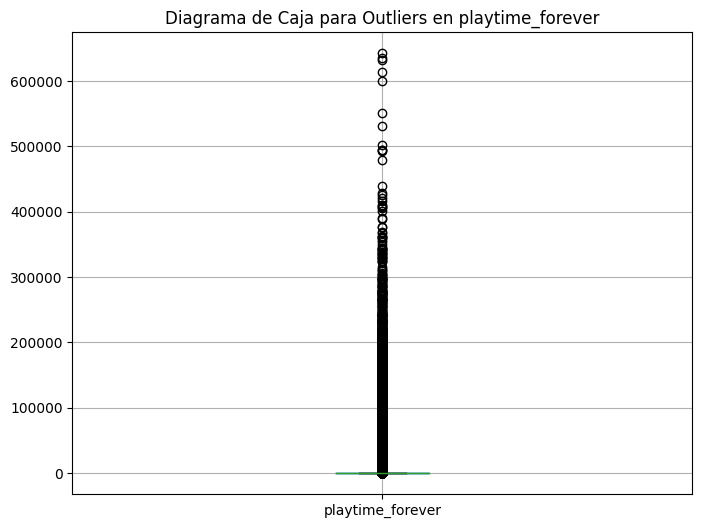

In [13]:
import matplotlib.pyplot as plt

# Visualizar los outliers en "playtime_forever"
columna = 'playtime_forever'

# Crear un diagrama de caja para identificar outliers
plt.figure(figsize=(8, 6))
df_items_desanidado.boxplot(column=columna)
plt.title('Diagrama de Caja para Outliers en ' + columna)
plt.show()


In [47]:
# Miro lo que voy a borrar los registros con forever mayor a 350000 son 243 dias de juego total por año
subset=df_items_desanidado[df_items_desanidado["playtime_forever"]>300000]

subset

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
9010,4000,Garry's Mod,303466,8117,76561198078738103
29909,313740,Sakura Spirit,400827,9055,Forty-Nine
190851,1250,Killing Floor,366892,112,76561197961702279
231613,4000,Garry's Mod,428012,6021,Jaxon1049
234571,363970,Clicker Heroes,333482,8077,idonothack
...,...,...,...,...,...
4075729,42710,Call of Duty: Black Ops - Multiplayer,632452,8126,76561198019826668
4254471,4000,Garry's Mod,324449,0,DarrenDingo
4492979,268420,Aura Kingdom,337453,0,76561198054840158
4498897,4000,Garry's Mod,344931,0,76561198055326819


In [48]:
#borro los registros con forever mayor a 350000 son 243 dias de juego total por año
df_items_desanidado=df_items_desanidado[df_items_desanidado["playtime_forever"]<300000]



In [49]:
df_items_desanidado.describe()

,playtime_forever,playtime_2weeks
count,5.153146e+06,5.153146e+06
mean,9.867072e+02,9.080647e+00
std,5.232845e+03,1.396775e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,3.400000e+01,0.000000e+00
75%,3.550000e+02,0.000000e+00
max,2.991910e+05,1.996700e+04


In [ ]:
df_items_desanidado= df_items_desanidado.sort_values(by='item_id')
# Ordenar de forma ascendente
df_items_desanidado

In [ ]:
subset=df_items_desanidado[df_items_desanidado["user_id"]== "henryle"]
subset

In [51]:
df_items_desanidado.dropna(how="all",inplace=True)

In [52]:
# Escribo csv
df_items_desanidado.to_csv('df_items1.csv', index=False)  # El argumento index=False evita que se escriba el índice en el archivo

In [88]:
pd.set_option('display.max_colwidth', 50)

In [8]:
# Crear un DataFrame a partir de user_reviews
A_txt("user_reviews.json.gz","user_review.txt")
lista=leo_lineaxlinea("user_review.txt")
df_ur = pd.DataFrame(lista)


Total de líneas o registros: 25799
Registros leídos correctamente: 25799
Registros mal leídos en líneas: []


In [23]:
df_ur.head(2)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."


In [ ]:
# EXTRAIGO SOLO LAS QUE NECESITO  DEL USER_REVIWS

# Utilizo apply para extraer las claves que necesito
df_ur['review'] = df_ur['reviews'].apply(lambda x: [item['review'] for item in x])

df_ur['recommend'] = df_ur['reviews'].apply(lambda x: [item['recommend'] for item in x])
df_ur['item_id'] = df_ur['reviews'].apply(lambda x: [item['item_id'] for item in x])
df_ur['posted'] = df_ur['reviews'].apply(lambda x: [item['posted'] for item in x])
# Elimina la columna original 'reviews' si ya no la necesitas
#df_ur = df_ur.drop('reviews', axis=1)

# Imprime el DataFrame resultante
df_ur.head(2)


In [ ]:
pd.set_option('display.max_colwidth', 500)
# nada mas para mirar
df_ur[["review"]	]


In [ ]:
# creo la columna 'sentiment_analysis' aplicando análisis de sentimiento con NLP
# con la siguiente escala: debe tomar el valor '0' si es malo, '1' si es neutral y '2' si es positivo. 
# Esta nueva columna debe reemplazar la de user_reviews.review para facilitar el trabajo de los modelos 
# de machine learning y el análisis de datos. 
# De no ser posible este análisis por estar ausente la reseña escrita, debe tomar el valor de 1.


from textblob import TextBlob


# Función para realizar el análisis de sentimiento y mapear a la escala deseada
def analizo_sentimiento(text):
    if not isinstance(text, str):
        text = str(text)  # Convierte la entrada a una cadena de texto

    if not text:
        return 1  # Neutral si no hay reseña
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity

    if sentiment_score < 0:
        return 0  # Malo si el sentimiento es negativo
    elif sentiment_score > 0:
        return 2  # Positivo si el sentimiento es positivo
    else:
        return 1  # Neutral si el sentimiento es neutral

# Aplicar el análisis de sentimiento y crear la nueva columna
df_ur['sentiment_analysis'] = df_ur['review'].apply(analizo_sentimiento)

# Imprimir el DataFrame resultante
df_ur


In [34]:
type(df_ur['item_id'][0])

list

In [ ]:
# DESANIDO ITEMS
import re

# Cadena que contiene las fechas
cadena = "Posted November 5, 2011., Posted July 15, 2011., Posted April 21, 2011."

# Crear una lista para almacenar los elementos desanidados
desanidado = []

# Iterar a través de las filas del DataFrame
for _, row in df_ur.iterrows():
    item_id = row['item_id'] # le saco los corchetes
    
    #le saco primer y ultimo caracter
    recommend = row['recommend']#le saco primer y ultimo caracter
    anio=row['posted']
      
    
    for item1, item2,item3 in zip(item_id, recommend,anio):
                
        # Usar una expresión regular para encontrar los años en la cadena
        item3=re.findall(r'\d{4}', item3)
        print(item3)
        if item3:
            item3= int(item3[0])
        else: item3=0 
        
        desanidado_item = {'item_id': item1, 'recommend': item2, 'anio':item3}
        # Agregar otras columnas del DataFrame original
        desanidado_item['user_id'] = row['user_id']
        desanidado_item['sentiment_analysis'] = row['sentiment_analysis']
        desanidado.append(desanidado_item)

# Crear un DataFrame a partir de la lista desanidada
df_urd = pd.DataFrame(desanidado)


In [66]:
df_ur.head(2)

,item_id,recommend,anio,user_id,sentiment_analysis
0,1250,True,2011,76561197970982479,2
1,22200,True,2011,76561197970982479,2


In [11]:
# Escribo csv
df_urd.to_csv('user_review.csv', index=False)  # El argumento index=False evita que se escriba el índice en el archivo
